## LIBRARY YANG DIPAKAI

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Memanggil Dataset

In [3]:
tampil = pd.read_csv ('toyota.csv')
tampil.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
tampil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


<Axes: >

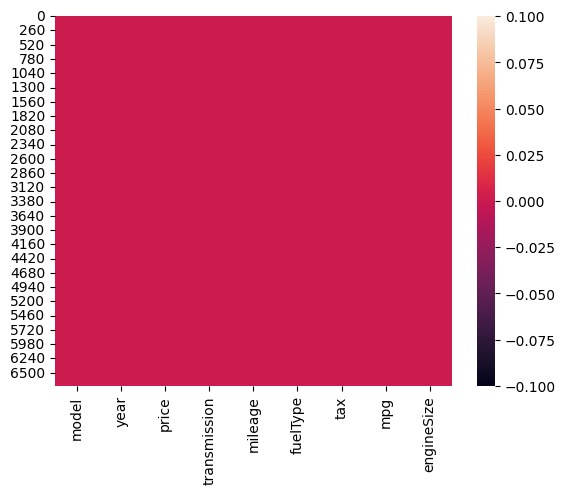

In [5]:
sns.heatmap (tampil.isnull())

In [6]:
tampil.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


## Visualisasi Data

In [7]:
# Pilih kolom numerik saja
numeric_columns = tampil.select_dtypes(include=['float64', 'int64']).columns

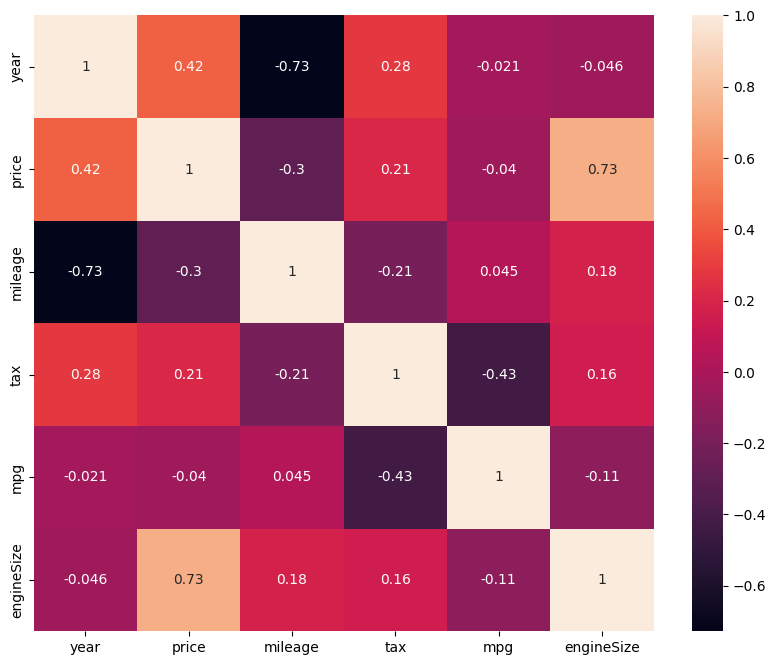

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(tampil[numeric_columns].corr(), annot=True)
plt.show()

In [9]:
models = tampil.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax' : 'numberOfCars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

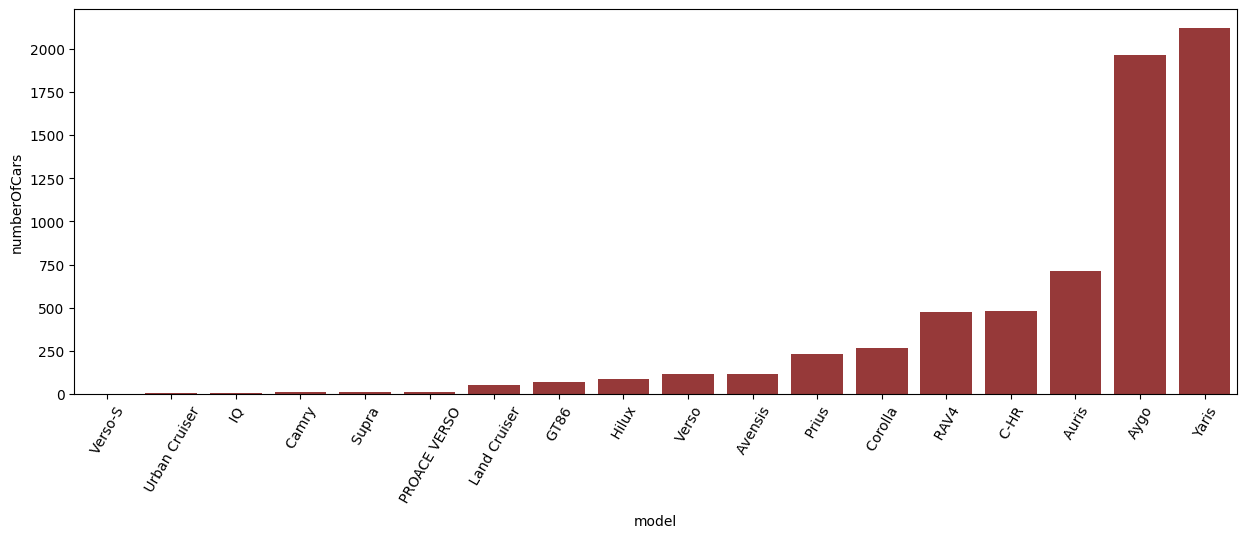

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='brown')
plt.xticks(rotation=60)

## Plot untuk Engine Size

In [11]:
engine = tampil.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax' : 'count'})

<Axes: xlabel='engineSize', ylabel='count'>

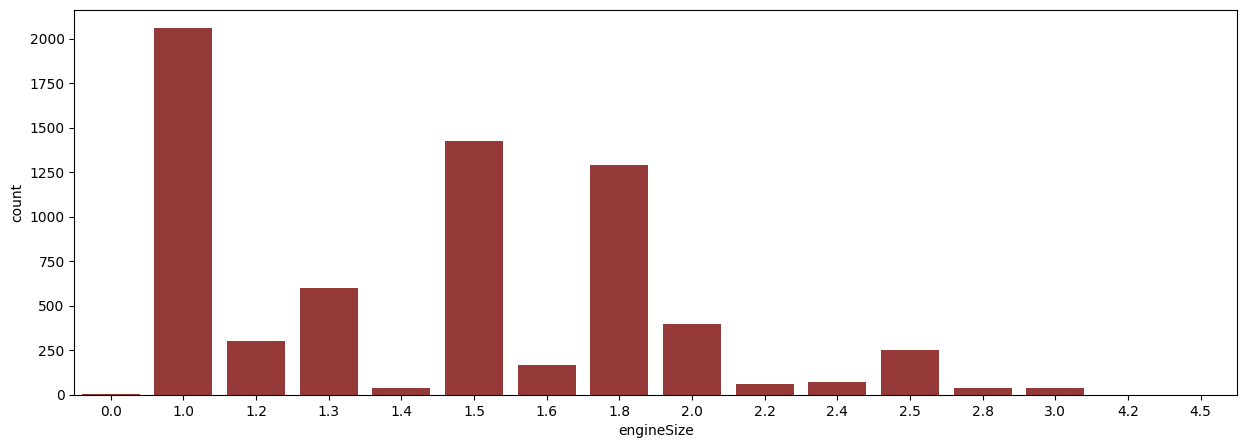

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='brown')

## Distribusi Mileage

<Figure size 1500x500 with 0 Axes>

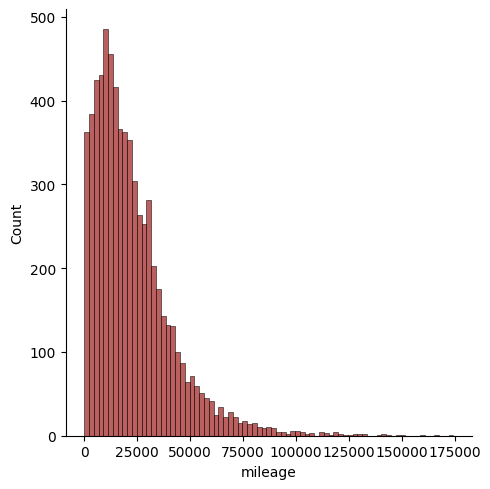

In [13]:
plt.figure(figsize=(15,5))
sns.displot(tampil['mileage'], color='brown')

## Distribusi Harga Mobil

<Figure size 1500x500 with 0 Axes>

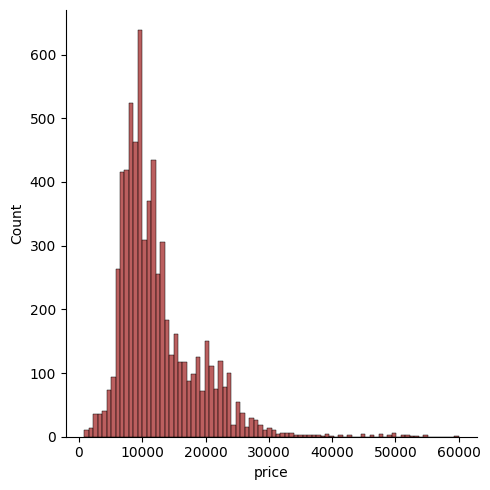

In [14]:
plt.figure(figsize=(15,5))
sns.displot(tampil['price'], color='brown')

## Seleksi Fitur


In [15]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = tampil[features]

y = tampil['price']
x.shape, y.shape

((6738, 5), (6738,))

## Splitting data training dan data testing

In [16]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split (x,y, random_state=70)
y_test.shape

(1685,)

## Membuat Model Regresi Linier

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [18]:
score = lr.score(X_test, y_test)
print("Akurasi model Regresi Linier = ", score *100, "%")

Akurasi model Regresi Linier =  76.78983314475177 %


In [19]:
tampil.sample()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1219,Yaris,2018,12000,Automatic,9797,Petrol,145,60.1,1.5


## Membuat Inputan model Regresi Linier

In [20]:
input_data = np.array([[2017, 19404, 145, 58.9, 1.5]])

prediction = lr.predict(input_data)
estimasi = prediction * 15000
print(f"Estimasi harga Mobil dalam IDR = Rp.", estimasi)

Estimasi harga Mobil dalam IDR = Rp. [1.983063e+08]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))